

Original data

        0      1       2       3        4        5        6        7       8   \
0   17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1   20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2   19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3   11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4   20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
5   12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
6   18.25  19.98  119.60  1040.0  0.09463  0.10900  0.11270  0.07400  0.1794   
7   13.71  20.83   90.20   577.9  0.11890  0.16450  0.09366  0.05985  0.2196   
8   13.00  21.82   87.50   519.8  0.12730  0.19320  0.18590  0.09353  0.2350   
9   12.46  24.04   83.97   475.9  0.11860  0.23960  0.22730  0.08543  0.2030   
10  16.02  23.24  102.70   797.8  0.08206  0.06669  0.03299  0.03323  0.1528   
11  15.78  17.89  103.

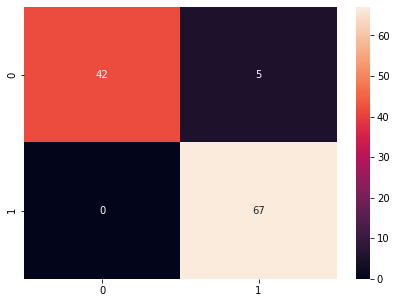


Classification report
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Accuracy of the testing dataset :  95.6140350877193
Accuracy of the training dataset:  94.5054945054945
Accuracy of the validation dataset:  100.0
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, y_pred, y_test]
Index: []

[0 rows x 32 columns]
         0      1       2      3        4        5        6        7       8  \
20   11.84  18.70   77.93  440.6  0.11090  0.15160  0.12180  0.05182  0.2301   
40   15.13  29.81   96.71  719.5  0.08320  0.04605  0.04686  0.02739  0.1852   
42   16.02  23.24  102.70  797.8  0.08206  0.06669  0.03299  0.03323  0.1528

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#load the breast_cancer dataset
dataset = load_breast_cancer()

#Use dataframe to load the data
df = pd.DataFrame(dataset.data)

#Define X and y variable
X=dataset["data"]
y=dataset["target"]

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_validation, y_train, y_validation = train_test_split(X_test, y_test, test_size = 0.2, random_state = 0)

#Training and testing data
print("\n")
print("Original data\n\n",df.head(20))
print("After vectorized train data\n\n",X_train,"\n\n",y_train)
print("After vectorized test data\n\n",X_test)

#Random Forest Classifier with tuned hyperparameters
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                             bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

#fitting the model
clf.fit(X_train, y_train)
clf.fit(X_test, y_test)
clf.fit(X_validation, y_validation)


# Predicting the Test, train, and validation results
y_pred = clf.predict(X_test)
y_pred1 = clf.predict(X_train)
y_pred2 = clf.predict(X_validation)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n","Confusion matrix\n")
fig, ax = plt.subplots(figsize=(7,5))

#Ploting the heatmap to see the classification of the confusion matrix that predicts true/false for true values and true/false for false values.
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


#Printing the accuracy values for the testing, training, and validation dataset
print("\nClassification report\n",metrics.classification_report(y_test, y_pred))
print("\nAccuracy of the testing dataset : ",metrics.accuracy_score(y_test, y_pred)*100)
print("Accuracy of the training dataset: ",metrics.accuracy_score(y_train, y_pred1)*100)
print("Accuracy of the validation dataset: ",metrics.accuracy_score(y_validation, y_pred2)*100)

#All the incorrect predictions to be shown
df2 = pd.DataFrame(X_test)
df2['y_pred'] = y_pred
df2['y_test'] = y_test
df_filtered = df2[(df2['y_pred'] == 0) & (df2['y_test'] == 1)]
print(df_filtered)
df_filtered2 = df2[(df2['y_pred'] == 1) & (df2['y_test'] == 0)]
df_filtered2.head()
df_final = pd.concat([df_filtered, df_filtered2])
print(df_final)



Original data

        0      1       2       3        4        5        6        7       8   \
0   17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1   20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2   19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3   11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4   20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
5   12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
6   18.25  19.98  119.60  1040.0  0.09463  0.10900  0.11270  0.07400  0.1794   
7   13.71  20.83   90.20   577.9  0.11890  0.16450  0.09366  0.05985  0.2196   
8   13.00  21.82   87.50   519.8  0.12730  0.19320  0.18590  0.09353  0.2350   
9   12.46  24.04   83.97   475.9  0.11860  0.23960  0.22730  0.08543  0.2030   
10  16.02  23.24  102.70   797.8  0.08206  0.06669  0.03299  0.03323  0.1528   
11  15.78  17.89  103.

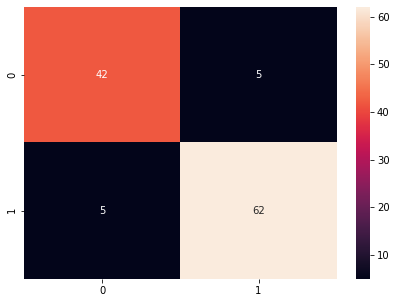


Classification report
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        47
           1       0.93      0.93      0.93        67

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114


Accuracy of the testing dataset :  91.22807017543859
Accuracy of the training dataset:  89.01098901098901
Accuracy of the validation dataset:  100.0
        0      1      2      3        4       5        6        7       8  \
14  14.64  15.24  95.77  651.9  0.11320  0.1339  0.09966  0.07064  0.2116   
44  13.24  20.13  86.87  542.9  0.08284  0.1223  0.10100  0.02833  0.1601   
70  14.42  16.54  94.15  641.2  0.09751  0.1139  0.08007  0.04223  0.1912   
77  13.05  18.59  85.09  512.0  0.10820  0.1304  0.09603  0.05603  0.2035   
92  14.99  22.11  97.53  693.7  0.08515  0.1025  0.06859  0.03876  0.1944   

          9  ...      22     23     

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

#load the breast_cancer dataset
dataset = load_breast_cancer()

#Use dataframe to load the data
df = pd.DataFrame(dataset.data)

#Define X and y variable
X=dataset["data"]
y=dataset["target"]

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_validation, y_train, y_validation = train_test_split(X_test, y_test, test_size = 0.2, random_state = 0)

#Training and testing data
print("\n")
print("Original data\n\n",df.head(20))
print("After vectorized train data\n\n",X_train,"\n\n",y_train)
print("After vectorized test data\n\n",X_test)

#Gradient Boosting Classifier model with tuned hyperparameters
clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                 criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                 min_impurity_split=None, init=None, random_state=None, max_features=None, 
                                 verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
                                 n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

#fitting the model
clf.fit(X_train, y_train)
clf.fit(X_test, y_test)
clf.fit(X_validation, y_validation)


# Predicting the Test, train, and validation results
y_pred = clf.predict(X_test)
y_pred1 = clf.predict(X_train)
y_pred2 = clf.predict(X_validation)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n","Confusion matrix\n")
fig, ax = plt.subplots(figsize=(7,5))

#Ploting the heatmap to see the classification of the confusion matrix that predicts true/false for true values and true/false for false values.
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


#Printing the accuracy values for the testing, training, and validation dataset
print("\nClassification report\n",metrics.classification_report(y_test, y_pred))
print("\nAccuracy of the testing dataset : ",metrics.accuracy_score(y_test, y_pred)*100)
print("Accuracy of the training dataset: ",metrics.accuracy_score(y_train, y_pred1)*100)
print("Accuracy of the validation dataset: ",metrics.accuracy_score(y_validation, y_pred2)*100)

#Providing all the incorrect predicted results
df2 = pd.DataFrame(X_test)
df2['y_pred'] = y_pred
df2['y_test'] = y_test
df_filtered = df2[(df2['y_pred'] == 0) & (df2['y_test'] == 1)]
print(df_filtered)
df_filtered2 = df2[(df2['y_pred'] == 1) & (df2['y_test'] == 0)]
df_filtered2.head()
df_final = pd.concat([df_filtered, df_filtered2])
print(df_final)